In [ ]:
!unzip /content/new_data2.zip

In [ ]:
import pandas as pd
import numpy as np
import panel as pn
import warnings; warnings.filterwarnings('ignore')

def show_panel(df):
    return pn.widgets.Tabulator(df.head(20),
                    show_index=False,
                    pagination='local', 
                         page_size=10)
    
    
pn.extension('tabulator')
pn.widgets.Tabulator.theme = 'bootstrap'

validation = pd.read_csv('/content/validation.csv')
train = pd.read_csv('/content/new_train2.csv')
test = pd.read_csv('/content/new_test2.csv')
# train= train.dropna()
# test = test.dropna()
print('Dataset information:')
print(f'Training data: {train.shape}')
print(f'Validation data: {validation.shape}')
print(f'Test data: {test.shape}')
train.label.value_counts()

Dataset information:
Training data: (81000, 2)
Validation data: (2000, 2)
Test data: (8257, 2)


1.0    22064
0.0    15710
6.0    10030
7.0     8164
3.0     7350
4.0     6751
5.0     6218
2.0     4713
Name: label, dtype: int64

In [ ]:
train.fillna(method="ffill",inplace=True)

In [ ]:
train.isnull().sum()

label    0
text     0
dtype: int64

In [ ]:
show_panel(train)
# joy(1)        5362
# sadness(0)     4666
# anger(3)   2159
# fear(4)        1937
# love (2)       1304
# surprise(5)     572

Tabulator(page_size=10, pagination='local', show_index=False, value=    label                 ...)

In [ ]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from datasets import Dataset,DatasetDict,Features,Value,ClassLabel

# Don't forget the class label data
class_names = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise','neutral','worry']
ft = Features({'text': Value('string'), 'label': ClassLabel(names=class_names)})

# neutral       8638
# worry         8459
# happiness     5209
# sadness       5165
# love          3842
# surprise      2187
# fun           1776
# relief        1526
# hate          1323
# empty          827
# enthusiasm     759
# boredom        179
# anger          110
# Combine Multiple Datasets 
emotions = DatasetDict({
    "train": Dataset.from_pandas(train,features=ft),
    "test": Dataset.from_pandas(test,features=ft),
    "validation": Dataset.from_pandas(validation,features=ft)
    })

# Convert a single DataFrame to a Dataset
# emotions = Dataset.from_pandas(train,features=ft)

emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 81000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 8257
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [ ]:
train['text']

0                                                   Why ? 
1          Sage Act upgrade on my to do list for tommorow.
2        ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3         Such an eye ! The true hazel eye-and so brill...
4         ugh babe.. hugggzzz for u .!  babe naamazed n...
                               ...                        
80995    i just had a very brief time in the beanbag an...
80996    i am now turning and i feel pathetic that i am...
80997                       i feel strong and good overall
80998    i feel like this was such a rude comment and i...
80999    i know a lot but i feel so stupid because i ca...
Name: text, Length: 81000, dtype: object

In [ ]:
train_ds = emotions["train"]
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 81000
})

In [ ]:
train_ds[:5]


{'text': [' Why ? ',
  'Sage Act upgrade on my to do list for tommorow.',
  'ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN I HATE FUNERALS THIS REALLY SHOWS ME HOW BLESSED I AM ',
  " Such an eye ! The true hazel eye-and so brilliant ! Regular features , open countenance , with a complexion , Oh ! What a bloom of full health , and such a pretty height and size ; such a firm and upright figure ! There is health , not merely in her bloom , but in her air , her head , her glance . One hears sometimes of a child being ' the picture of health ' ; now , she always gives me the idea of being the complete picture of grown-up health . She is loveliness itself . ",
  " ugh babe.. hugggzzz for u .!  babe naamazed nga ako e babe e, despite nega's mas pinaramdam at fil ko ang "],
 'label': [6, 1, 0, 1, 1]}

In [ ]:
emotions.set_format(type="pandas")
df = emotions["train"][:]
show_panel(df)

Tabulator(page_size=10, pagination='local', show_index=False, value=                          ...)

In [ ]:
# Add label data to dataframe
def label_int2str(row):
    return emotions["train"].features["label"].int2str(row)

df["label_name"] = df["label"].apply(label_int2str)
show_panel(df)

Tabulator(page_size=10, pagination='local', show_index=False, value=                          ...)

In [ ]:
import plotly.express as px

px.bar(df['label_name'].value_counts(ascending=True),template='plotly_white')

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

text          0
label         0
label_name    0
dtype: int64

In [ ]:
df["Words Per Tweet"] = df["text"].str.split().apply(len)

px.box(df,y='Words Per Tweet',
       color='label_name',
       template='plotly_white')

In [ ]:
# text = 'Tokenisation of text is a core task of NLP.'
# tokenised_text = list(text)

# # Character Tokenised list
# print(f'Number of tokens: {len(tokenised_text)}')
# print(tokenised_text)

In [ ]:
# token2idx = {ch: idx for idx, ch in enumerate(sorted(set(tokenised_text)))}

# print(f'Length of vocabulary: {len(token2idx)}')
# print(token2idx)

In [ ]:
# input_ids = [token2idx[token] for token in tokenised_text]

# print(f'{len(input_ids)} characters')
# print(input_ids)

In [ ]:
# import torch
# import torch.nn.functional as F

# inputs_ids = torch.tensor(input_ids)
# one_hot_encodings = F.one_hot(inputs_ids,num_classes = len(token2idx))
# print(f'OHE size: {one_hot_encodings.shape}')

In [ ]:
# tokenised_text = text.split()
# print(tokenised_text)

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from transformers import AutoTokenizer


# Load parameters of the tokeniser
model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

# Show tokeniser information
tokenizer

DistilBertTokenizerFast(name_or_path='distilbert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True)

In [ ]:
print('')
print(f'Vocab size: {tokenizer.vocab_size}')
print(f'Max length: {tokenizer.model_max_length}')
print(f'Tokeniser model input names: {tokenizer.model_input_names}')


Vocab size: 30522
Max length: 512
Tokeniser model input names: ['input_ids', 'attention_mask']


In [ ]:
# text = 'Tokenisation of text is a core task of NLP.'

# print('Encoded text')
# encoded_text = tokenizer(text)
# print(encoded_text,'\n')

# print('Tokens')
# tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
# print(tokens,'\n')

# print('Convert tokens to string')
# print(tokenizer.convert_tokens_to_string(tokens),'\n')

In [ ]:
emotions.reset_format()

In [ ]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 81000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 8257
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [ ]:
def tokenise(batch):
    batch["text"]=['None' if v is None else v for v in batch["text"]]
    return tokenizer(batch["text"], padding=True, truncation=True)

# Show the tokenised ids
ex_tokenised = tokenise(emotions["train"][:2])

In [ ]:
ex_tokenised['attention_mask']
train.isnull().sum()

label    0
text     0
dtype: int64

In [ ]:
emotions_encoded = emotions.map(tokenise, batched=True, batch_size=128)
print(emotions_encoded["train"].column_names)

Map:   0%|          | 0/81000 [00:00<?, ? examples/s]

Map:   0%|          | 0/8257 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

['text', 'label', 'input_ids', 'attention_mask']


In [ ]:
import warnings; warnings.filterwarnings('ignore')
from transformers import AutoModel
import torch

model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
text = "this is a test"
inputs = tokenizer(text, return_tensors="pt")
print(f"Input tensor shape: {inputs['input_ids'].size()}")

Input tensor shape: torch.Size([1, 6])


In [ ]:
inputs = {k:v.to(device) for k,v in inputs.items()}

with torch.no_grad():
    outputs = model(**inputs)
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]],
       device='cuda:0'), hidden_states=None, attentions=None)


In [ ]:
print(outputs.last_hidden_state.size())
print(outputs.last_hidden_state[:,0].size())

torch.Size([1, 6, 768])
torch.Size([1, 768])


In [ ]:
def extract_hidden_states(batch):
    
    # Place model inputs on the GPU
    inputs = {k:v.to(device) for k,v in batch.items()
              if k in tokenizer.model_input_names}
    
    # Extract last hidden states
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
        
    # Return vector for [CLS] token
    return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}

In [ ]:
emotions_encoded.set_format("torch",
                            columns=["input_ids", "attention_mask", "label"])
emotions_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 81000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 8257
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

In [ ]:
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True,batch_size=128)
emotions_hidden["train"].column_names

Map:   0%|          | 0/81000 [00:00<?, ? examples/s]

Map:   0%|          | 0/8257 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

In [ ]:
X_train = np.array(emotions_hidden["train"]["hidden_state"])
X_valid = np.array(emotions_hidden["validation"]["hidden_state"])
y_train = np.array(emotions_hidden["train"]["label"])
y_valid = np.array(emotions_hidden["validation"]["label"])
print(f'Training Dataset: {X_train.shape}')
print(f'Validation Dataset {X_valid.shape}')

Training Dataset: (81000, 768)
Validation Dataset (2000, 768)


In [ ]:
X_train

array([[-0.0523151 , -0.01271918,  0.05364069, ..., -0.07780262,
         0.31247723,  0.25427338],
       [-0.01663946, -0.2815513 ,  0.01137179, ..., -0.01805273,
         0.25993028,  0.175879  ],
       [ 0.11095049,  0.0441572 ,  0.19775335, ..., -0.13270694,
         0.47372776,  0.12071175],
       ...,
       [-0.00339821, -0.09585529,  0.05843538, ..., -0.04272714,
         0.24959186,  0.30761617],
       [ 0.0666026 ,  0.17334326,  0.12896699, ...,  0.06118589,
         0.29038242,  0.46844155],
       [ 0.01668792,  0.10127119, -0.00731717, ..., -0.06493612,
         0.3454054 ,  0.2199358 ]], dtype=float32)

In [ ]:
import warnings; warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE

# Scale the data
X_scaled = MinMaxScaler().fit_transform(X_train)

# lower dimension transformation
model = TSNE(n_components=2).fit(X_scaled)

# Create a df of 2D embeddings
df_embedding = pd.DataFrame(model.embedding_, columns=["X", "Y"])
df_embedding["label"] = y_train
df_embedding.head()

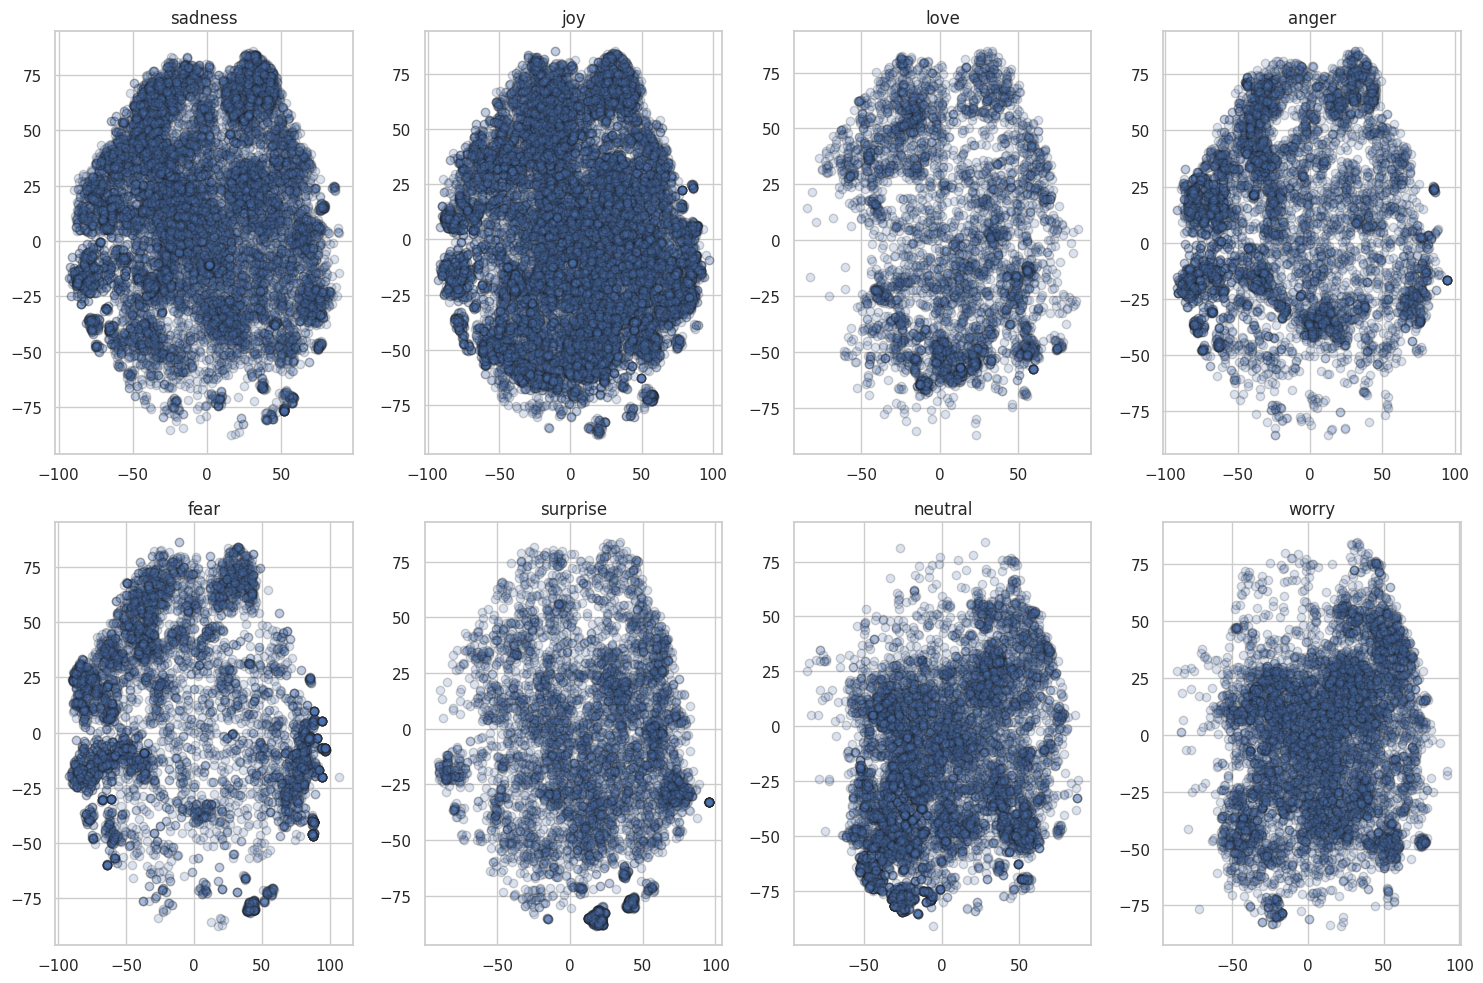

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='whitegrid')

fig, axes = plt.subplots(2, 4, figsize=(15,10))
axes = axes.flatten()
labels = emotions["train"].features["label"].names

for i, label in enumerate(labels):

    dict_embedding_sub = dict(tuple(df_embedding.groupby('label')))
    df_embedding_sub = dict_embedding_sub[i]                        
    
    axes[i].scatter(df_embedding_sub["X"], 
                    df_embedding_sub["Y"],
                    lw=1,ec='k',alpha=0.2)
    
    axes[i].set_title(f'{label}')

plt.tight_layout()
plt.show()

In [ ]:
# from sklearn.dummy import DummyClassifier

# dummy_clf = DummyClassifier(strategy="most_frequent")
# dummy_clf.fit(X_train, y_train)
# print(f'accuracy: {dummy_clf.score(X_valid, y_valid)}')

In [ ]:
# from sklearn.linear_model import LogisticRegression as LR

# # We increase `max_iter` to guarantee convergence
# lr_clf = LR(max_iter = 2000)
# lr_clf.fit(X_train, y_train)
# y_preds = lr_clf.predict(X_valid)
# print(f'accuracy: {lr_clf.score(X_valid, y_valid)}')

In [ ]:
from transformers import AutoModelForSequenceClassification

num_labels = 8

model_ckpt = "distilbert-base-uncased"
model = (AutoModelForSequenceClassification
         .from_pretrained(model_ckpt, 
                          num_labels=num_labels)
         .to(device))

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classi

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

In [ ]:
torch.cuda.empty_cache()


In [ ]:
from transformers import Trainer, TrainingArguments

bs = 64 # batch size
logging_steps = len(emotions_encoded["train"]) // bs
model_name = f"{model_ckpt}-finetuned-emotion"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=10,             # number of training epochs
                                  learning_rate=2e-5,             # model learning rate
                                  per_device_train_batch_size=bs, # batch size
                                  per_device_eval_batch_size=bs,  # batch size
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False, 
                                  report_to="none",
                                  logging_steps=logging_steps,
                                  push_to_hub=False,
                                  log_level="error")

In [ ]:
import os
from transformers import Trainer
os.environ['WANDB_DISABLED'] = 'true'

trainer = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=emotions_encoded["train"],
                  eval_dataset=emotions_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train()

Epoch,Training Loss,Validation Loss


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,1.282500,0.266173,0.913000,0.914937
2,1.023600,0.169423,0.933000,0.934364
3,0.907200,0.162140,0.935500,0.936622
4,0.793100,0.164626,0.934500,0.935269
5,0.689200,0.165785,0.940500,0.941329
6,0.599700,0.187374,0.937500,0.938397


In [ ]:
wpred_output = trainer.predict(emotions_encoded["validation"])
pred_output

In [ ]:
print(f'Output Predition: {pred_output.predictions.shape}')
print(pred_output.predictions)

In [ ]:
y_preds = np.argmax(pred_output.predictions,axis=1)
print(f'Output Prediction:{y_preds.shape}')
print(f'Predictions: {y_preds}')

In [ ]:
pred_output.metrics

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_model, y_true, labels):
    cm = confusion_matrix(y_true,y_model,normalize='true')
    fig, ax = plt.subplots(figsize=(7,7))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(ax=ax, colorbar=False)
    plt.title("Confusion matrix")
#     plt.axis('off')
    plt.grid(False)
    plt.show()

In [ ]:
plot_confusion_matrix(y_preds,y_valid,labels)

In [ ]:
from torch.nn.functional import cross_entropy

def forward_pass_with_label(batch):
    
    # Place all input tensors on the same device as the model
    inputs = {k:v.to(device) for k,v in batch.items()
              if k in tokenizer.model_input_names}

    with torch.no_grad():
        output = model(**inputs)
        pred_label = torch.argmax(output.logits, axis=-1)
        loss = cross_entropy(output.logits, batch["label"].to(device),
                             reduction="none")
        
    # Place outputs on CPU for compatibility with other dataset columns
    return {"loss": loss.cpu().numpy(),
            "predicted_label": pred_label.cpu().numpy()}

# Convert our dataset back to PyTorch tensors
emotions_encoded.set_format("torch",
                            columns=["input_ids", "attention_mask", "label"])
# Compute loss values
emotions_encoded["validation"] = emotions_encoded["validation"].map(forward_pass_with_label,
                                                                    batched=True, 
                                                                    batch_size=16)

In [ ]:
emotions_encoded.set_format("pandas")
cols = ["text", "label", "predicted_label", "loss"]
df_test = emotions_encoded["validation"][:][cols]
df_test["label"] = df_test["label"].apply(label_int2str)
df_test["predicted_label"] = (df_test["predicted_label"].apply(label_int2str))

In [ ]:
trainer.save_model()

In [ ]:
# model = trainer.from_pretrained("./content/")

In [ ]:

from transformers import pipeline

# load from previously saved model
classifier = pipeline("text-classification", model="/content/distilbert-base-uncased-finetuned-emotion")


In [ ]:
# New unseen by model data
new_data = "i got a promotion today. i want to travel somewhere. iam going to attend my friend's party".split('.')

preds = classifier(new_data, return_all_scores=True)
preds

In [ ]:
# preds[4]

In [ ]:
df_preds = pd.DataFrame(preds[0])
px.bar(x=labels,y=100*df_preds['score'],template='plotly_white')

In [ ]:
# !zip /content/distilbert-base-uncased-finetuned-emotion

In [ ]:
# !zip -r '/content/distilbert-base-uncased-finetuned-emotion'

In [ ]:
!zip -r "/content/drive/MyDrive/NEW_output_file_name.zip" "/content/distilbert-base-uncased-finetuned-emotion/"


In [ ]:


trainer.predict(gg)